Reference: (Lonsdale et. al., 2013, http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0062726)  

This is based on a notebook and research by Edmund Lau.

Each 3D trajectory in represents the colour change (trajectory in RGB) of a colorimetric sensor array spot in response to bacterial growth.

In [3]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

plt.rcParams['animation.html'] = 'html5'

In [4]:
curves = np.load('data/color-paths.npy')

In [5]:
curves.shape

(9, 100, 3)

# The law of common fate

Our visual system groups together objects that are moving together in a scene. Watch how you effortlessly group together the spots that move in similar directions.

We are going to use the `matplotlib.animation.FuncAnimation` API. This takes a function with frame number as the first argument, optionally other arguments, and then produces a frame. Read more at http://matplotlib.org/api/animation_api.html and https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html.

In [8]:
x = 75
f'x times 5 is {x * 5}' 

'x times 5 is 375'

In [6]:
interval = 20

def animate_points(frame_i, ax, curves, time_text):
    # we are re-using the same axis, so remove previous points
    # or the full path appears as "trails"
    ax.collections.clear()
    for i, coords in enumerate(curves):
        ax.scatter3D(coords[frame_i, 0], coords[frame_i, 1],
                     coords[frame_i, 2], c='C0')
    time_text.set_text(f'{frame_i * interval} min')
    return ax

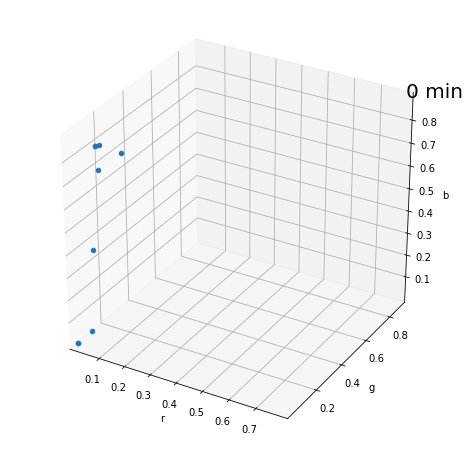

In [7]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

for i, func in enumerate([ax.set_xlim, ax.set_ylim, ax.set_zlim]):
    func(np.min(curves[..., i]), np.max(curves[..., i]))

ax.set_xlabel('r')
ax.set_ylabel('g')
ax.set_zlabel('b')

time_text = ax.text3D(ax.get_xlim3d()[-1], 
                      ax.get_ylim3d()[-1], 
                      ax.get_zlim3d()[-1],
                      '',
                      size=20)

ani = animation.FuncAnimation(fig, animate_points, 
                              frames=curves.shape[1], 
                              fargs=(ax, curves, time_text), 
                              interval=100)

# ani.save('rgb-trajectories-no-guides.mp4') 
ani

# Common fate + similarity

Now, we can add colour information, to see the points changing colour together as they move.

In [9]:
interval = 20

def animate_points_colour(frame_i, ax, curves, time_text):
    ax.collections.clear()
    for i, coords in enumerate(curves):
        ax.scatter3D(coords[frame_i, 0], coords[frame_i, 1],
                     coords[frame_i, 2], c=coords[frame_i])
    time_text.set_text(f'{frame_i * interval} min')
    return ax

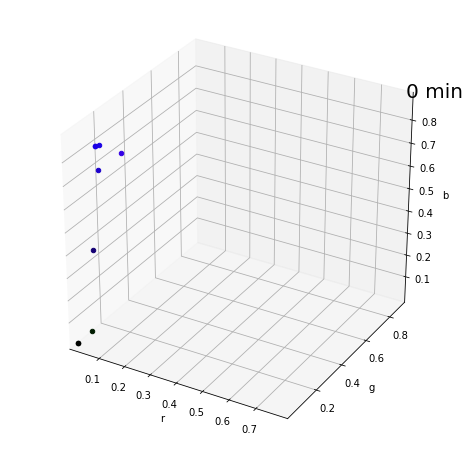

In [10]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

for i, func in enumerate([ax.set_xlim, ax.set_ylim, ax.set_zlim]):
    func(np.min(curves[..., i]), np.max(curves[..., i]))

ax.set_xlabel('r')
ax.set_ylabel('g')
ax.set_zlabel('b')

time_text = ax.text3D(ax.get_xlim3d()[-1], 
                      ax.get_ylim3d()[-1], 
                      ax.get_zlim3d()[-1],
                      '',
                      size=20)

ani = animation.FuncAnimation(fig, animate_points_colour, 
                              frames=curves.shape[1], 
                              fargs=(ax, curves, time_text), 
                              interval=100)
# ani.save('rgb-scatter-with-colour.mp4')
ani

# Parallelism

Like common fate, but frozen in time. Note how no information other than some gray lines makes you automatically group them together.

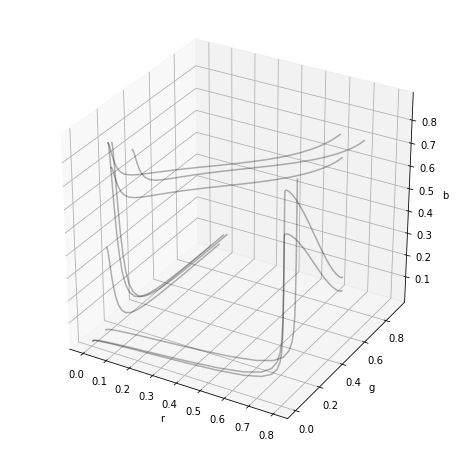

In [11]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('r')
ax.set_ylabel('g')
ax.set_zlabel('b')

for curve in curves:
    ax.plot3D(xs=curve[:, 0], ys=curve[:, 1], zs=curve[:, 2],
              alpha=0.3, color='black')
fig.savefig('3D trajectories no colour.png', dpi=300) 

# Parallelism + common fate

We can trace the points' trajectories in the animation to enhance the grouping effect.

In [14]:
interval = 20

def animate_parametric_curves(frame_i, ax, curves, lines, time_text):
    ax.collections.clear()
    for i, coords in enumerate(curves):
        line = lines[i]
        line.set_data(coords[:frame_i, 0], coords[:frame_i, 1])
        line.set_3d_properties(coords[:frame_i, 2])
        ax.scatter3D(coords[:frame_i, 0], coords[:frame_i, 1],
                     coords[:frame_i, 2], c = coords[:frame_i])
    time_text.set_text(f'{frame_i * interval} min')
    return ax

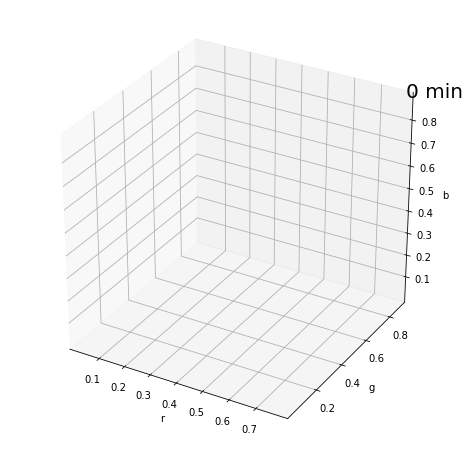

In [15]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

for i, func in enumerate([ax.set_xlim, ax.set_ylim, ax.set_zlim]):
    func(np.min(curves[..., i]), np.max(curves[..., i]))

ax.set_xlabel('r')
ax.set_ylabel('g')
ax.set_zlabel('b')

time_text = ax.text3D(ax.get_xlim3d()[-1], 
                      ax.get_ylim3d()[-1], 
                      ax.get_zlim3d()[-1],
                      '',
                      size=20)

lines = [ax.plot3D(coords[0:1, 0], coords[0:1, 1], coords[0:1, 2],
                   lw=0.5, alpha=0.5, color='black')[0] 
         for coords in curves]


ani = animation.FuncAnimation(fig, animate_parametric_curves, 
                              frames=curves.shape[1], 
                              fargs=(ax, curves, lines, time_text), 
                              interval=100)

# ani.save('trails.mp4') 
ani

## Exercise

- modify the code above to show all past point positions as they move through the space. This can indicate the speed at each position.

# Paralellism and similarity

We can colour to enhance the similarity between different curves.

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('r')
ax.set_ylabel('g')
ax.set_zlabel('b')

for curve in curves:
    ax.scatter3D(xs=curve[:, 0], ys=curve[:, 1], zs=curve[:, 2],
                 c=curve, depthshade=False)
    ax.plot3D(xs=curve[:, 0], ys=curve[:, 1], zs=curve[:, 2],
              alpha=0.3, color='black')
fig.savefig('3D trajectories.png', dpi=300) 

## Exercises

- Use the Gapminder five year dataset to show the trajectories of countries' life expectancy vs GDP over time. Colour the countries by region and size them by log(population).
- Add interpolation to the dataset to produce values for intermediate years. (See [here](https://stackoverflow.com/questions/41854578/using-pandas-dataframe-interpolate-to-add-rows-to-dataframe), [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.interpolate.html) and [here](https://pandas.pydata.org/pandas-docs/stable/missing_data.html).)
- Add streaks (or remove them).
- Plot just the trajectories (no colour or animation) of a few selected countries to illustrate parallelism. *Hint:* South-East Asian countries had very different trajectories to many African countries.

In [ ]:
data = pd.read_csv('data/gapminderDataFiveYear.csv')

def plot_gapminder_frame(i, ax)

- Produce an animated scatterplot of the cars dataset, with each year representing a frame (keeping all prior years on the frame).